# Artificial Neural Networks

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurolab as nl
%matplotlib inline

In [6]:
num_dataset = np.array([[0.22, 0.34, 0], [0.21, 0.37, 0], [0.25, 0.31, 0], [0.76, 0.19, 1], [0.84, 0.14, 1]])

In [7]:
features = num_dataset[:,:2]
labels = num_dataset[:, 2].reshape((num_dataset.shape[0], 1))   # reshaping (converting to Column)

In [8]:
features

array([[0.22, 0.34],
       [0.21, 0.37],
       [0.25, 0.31],
       [0.76, 0.19],
       [0.84, 0.14]])

Text(0.5, 1.0, 'Input Data Plot')

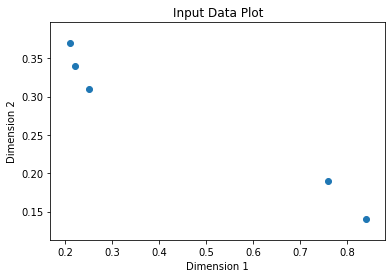

In [9]:
plt.scatter(features[:, 0], features[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data Plot')

In [10]:
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [11]:
num_output = labels.shape[1]

In [12]:
dim1 = [dim1_min, dim1_max]  # dimension 1
dim2 = [dim2_min, dim2_max]  # dimension 2

In [13]:
perceptron = nl.net.newp([dim1, dim2], num_output)

The goal of learning is reached


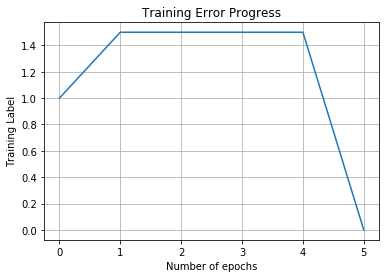

In [14]:
error_progress = perceptron.train(features, labels, epochs=100, show=20, lr=0.03) # training the model

# ploting perceptron progress(error progress)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training Label')
plt.title('Training Error Progress')
plt.grid()

In [15]:
# Predicting 
perceptron.sim([[0.81, 0.24]]) # should be in class 1

array([[1.]])

In [16]:
# Predicting 
perceptron.sim([[0.27, 0.42]]) # should be in class 0

array([[0.]])

## Sigle Layer Neural Network

* Collenction of artificial neurons

In [33]:
# !ls
txt = np.loadtxt('./data.txt')
data = txt[:, 0:2]
labels = txt[:,2:]

In [34]:
data

array([[1. , 4. ],
       [1.1, 3.9],
       [1.2, 4.1],
       [0.9, 3.7],
       [7. , 4. ],
       [7.2, 4.1],
       [6.9, 3.9],
       [7.1, 4.2],
       [4. , 1. ],
       [4.1, 0.9],
       [4.2, 0.8],
       [3.9, 0.8],
       [4. , 7. ],
       [4.2, 7.2],
       [3.9, 7.1],
       [4.1, 6.8]])

In [35]:
labels

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Text(0.5, 1.0, 'Input Data')

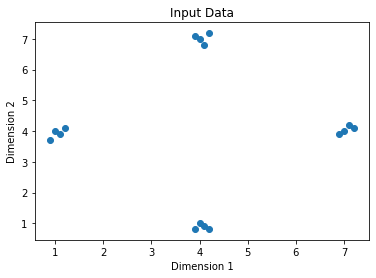

In [36]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data')
 

In [37]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()
num_output = labels.shape[1]
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]

In [52]:
# creating a single layer
snn = nl.net.newp([dim1, dim2], num_output)

In [53]:
# Training the Model
error_progress = snn.train(data, labels, epochs=20, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
The maximum number of train epochs is reached


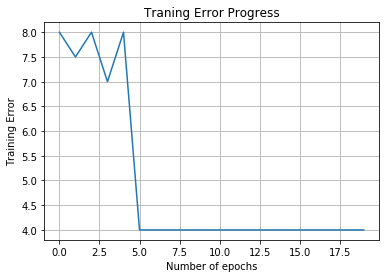

In [54]:
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training Error')
plt.title('Traning Error Progress')
plt.grid()

## Prediction

In [55]:
test_data = [[0.3, 4.2], [4.3, 0.5], [4.6, 8.0]]
print('Testing Data ==> Prediction')
for each_test in test_data:
    print(' ',each_test, '==>', snn.sim([each_test])[0])

Testing Data ==> Prediction
  [0.3, 4.2] ==> [0. 0.]
  [4.3, 0.5] ==> [1. 0.]
  [4.6, 8.0] ==> [1. 1.]


# Multi-Layer Neural Network
- y = 3x^2 + 5

In [92]:
min_val = -20
max_val = 20
num_points = 140
x = np.linspace(min_val, max_val, num_points)
y = 3*np.square(x)+5  # above mentioned equation
y /= np.linalg.norm(y)


Text(0.5, 1.0, 'Data Points')

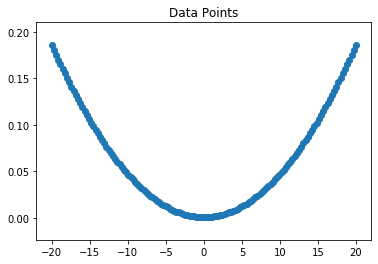

In [93]:
data = x.reshape(num_points, 1) # reshaping data points
labels = y.reshape(num_points, 1) # reshaping labels
# visulizing data
plt.scatter(data, labels)
plt.title('Data Points')

In [94]:
# multi layer neural network
mlnn = nl.net.newff([[min_val, max_val]], [10, 6, 1])   # 10 neurons for first layer, 6 for second layer and one for output layer
# gradient decent for training
mlnn.trainf = nl.train.train_gd
# training model
error_progress = mlnn.train(data, labels, epochs=2900, show=100, goal=0.01)

Epoch: 100; Error: 12.037665245985576;
Epoch: 200; Error: 0.13627156958442743;
Epoch: 300; Error: 0.012863430442406858;
Epoch: 400; Error: 0.10279100925675164;
Epoch: 500; Error: 0.06860115875369718;
Epoch: 600; Error: 0.01947733651142304;
Epoch: 700; Error: 0.025699089290162194;
Epoch: 800; Error: 0.03171171318790498;
The goal of learning is reached


Text(0.5, 1.0, 'Actual vs Predicted')

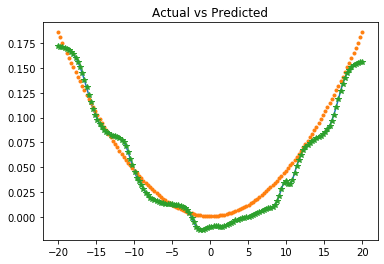

In [98]:
output = mlnn.sim(data) # simulating
y_predict = output.reshape(num_points)

x_dense = np.linspace(min_val, max_val, num_points*2)
y_dense_predict = mlnn.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.plot(x_dense, y_dense_predict, '-', x, y, '.', x, y_predict,'*')
plt.title('Actual vs Predicted')